<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/IAI%20BNLab_en1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SELF NOTE:**

```
P is phenotype P(1: sick, 0: not sic)
G is genotype  G(0: FF, 1: Ff, 2 :ff)

 q2 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'ReneP':1})
 
the above means SandraP is sick: 1 if her aunt ReneP is sick: 1

q4 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'EvaG':0,'AaronG':1})

The above means SandraP is sick: 1 with Genotype FF:0 and Ff: 1 from either parents (same result swap)

```



Let's start with creating a simple Naive Bayes Cassifier. The structure of the data is the following: a list of entry data of the same length is given. First n-1 spaces are for the values of the attributes of the given objects (for simplicity the values are only 0 or 1). The last space is left for the name of the class to which the object is assigned. We want to create a dictionary, for which the key is the name of the class, and the assigned value will contain a list of how many times 1 appiered in the given class on that position. This will be enough to construct a classifier. 


In [ ]:
def NaiveBayesLearn(li):

  out={} #dict name out

  for i in li:

    if i[-1] in out.keys():
        temp = out.get(i[-1])

        #here we add a loop which completes the list
        
    else:
      temp = i[0:len(i)-1]
      temp.append(1)
      out.update({i[-1] : temp}) 

  return out

With this simple dictionary we can create a classifier for new elements.


In [ ]:
def NaiveBayesClass(LearnBayes, newEl):

  samplesize = 0
  best = ""
  bestvalue = -1

  #for key in LearnBayes.keys():
    #here we calculate the size of the training sample

  for key in LearnBayes.keys():
    temp = LearnBayes.get(key)
    newvalue=temp[-1]/samplesize

    #here we calculate the value which the classifier assings for every key.If it is greater then the current bestvalue we need to replace the value best with the current key and replace best value with the current value.
    #the first value in the multiplication (probability of being in the class baset on the training set) has been already assigned. 
  
  return best

Using the newly created functions test them on two training sets. Set one:

In [ ]:
trening1 =[[1,1,1,1,"+"], 
          [1,1,0,1,"+"], 
          [0,1,1,0,"+"], 
          [1,0,0,1,"+"], 
          [1,0,0,0,"+"],
          [1,0,1,0,"-"],
          [0,1,0,0,"-"],
          [0,0,1,0,"-"]]

test11 = [1,1,0,0]
test12 = [0,0,1,0]
test13 = [0,1,1,0]

#call the proper functions

Set two:

In [ ]:
trening2 =[[1,1,0,0,1,1,"+"],
           [1,0,1,0,1,0,"+"],
           [1,1,1,0,0,0,"+"],
           [0,1,1,1,1,1,"+"],
           [0,1,0,1,1,1,"-"],
           [0,1,1,1,1,0,"-"],
           [1,1,0,0,1,1,"-"],
           [1,0,0,0,0,0,"-"],
           [0,0,0,0,0,0,"="],
           [1,1,1,1,1,1,"="],
           [0,0,1,1,0,1,"="],
           [1,0,1,1,0,1,"="]]
           
test21 = [1,1,1,1,0,0]
test22 = [1,1,0,0,1,1]
test23 = [0,0,0,0,0,1]

#call the proper functions

Now we will try to do some inference on a Bayes net. Firstly we have to create one. The proper tools can be found in **pgmpy**, but **bnlearn** contains tools that are easier to work with, so we will use it instead.


In [ ]:
#!pip install -U matplotlib

In [ ]:
import matplotlib

In [ ]:
#!pip install bnlearn

In [ ]:
import numpy as np

In [ ]:
#print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
import bnlearn


In [ ]:
from pgmpy.factors.discrete import TabularCPD

Firstly we need to construct a Directed Acyclic Graph (DAG for short), which contains information which nodes directly affect other nodes. The created graph is interactive, you may try to move the nodes for greater clarity.


In [ ]:
edges = [('RobinG','RobinP'),
         ('IraG','IraP'),
         ('EvaG','EvaP'),
         ('AaronG','AaronP'),
         ('RobinG','EvaG'),
         ('IraG','EvaG'),
         ('SandraG','SandraP'),
         ('AaronG','SandraG'),
         ('EvaG','SandraG'),
         ('JamesG','JamesP'),
         ('ReneG','ReneP'),
         ('RobinG','JamesG'),
         ('IraG','JamesG'),
         ('JasonG','JasonP'),
         ('BeniaminG','BeniaminP'),
         ('JamesG','JasonG'),
         ('JamesG','BeniaminG'),
         ('ReneG','JasonG'),
         ('ReneG','BeniaminG'),
         ]

DAG = bnlearn.make_DAG(edges)
bnlearn.plot(DAG, interactive = True)

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': '/content/bnlearn_causal_network.html',
 'pos': {'RobinG': array([-0.33338097, -0.18539862]),
  'RobinP': array([-1.        , -0.22144126]),
  'IraG': array([0.28501993, 0.01425118]),
  'IraP': array([0.80505618, 0.16907458]),
  'EvaG': array([ 0.32985787, -0.16540896]),
  'EvaP': array([ 0.32019585, -0.76129403]),
  'AaronG': array([ 0.08513925, -0.21790453]),
  'AaronP': array([-0.16425344, -0.867697  ]),
  'SandraG': array([0.33603807, 0.43289001]),
  'SandraP': array([0.50183828, 0.64648149]),
  'JamesG': array([-0.2494307 , -0.08468527]),
  'JamesP': array([-0.61487447, -0.78182705]),
  'ReneG': array([-0.05652856,  0.34098107]),
  'ReneP': array([-0.24697513,  0.87185037]),
  'JasonG': array([-0.646656  ,  0.72518593]),
  'JasonP': array([-0.61505098,  0.81912871]),
  'BeniaminG': array([ 0.54017294, -0.30877544]),
  'BeniaminP': array([ 0.72383188, -0.42541118])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fb02f443e20>,
 'node_properties': {'RobinG': {'node_color': '#1

The graph alone is not enough, we need also Conditional Probability Distribution tables for each node


In [ ]:
#Conditional Probability Distribution tabes for genes and probability of sickness

cpt_IraG = TabularCPD(variable='IraG', variable_card=3, values=[[0.01],
                                                                [0.18],
                                                                [0.81]])
cpt_RobinG = TabularCPD(variable='RobinG', variable_card=3, values=[[0.01],
                                                                    [0.18],
                                                                    [0.81]])
cpt_AaronG = TabularCPD(variable='AaronG', variable_card=3, values=[[0.01],
                                                                    [0.18],
                                                                    [0.81]])
cpt_ReneG = TabularCPD(variable='ReneG', variable_card=3, values=[[0.01],
                                                                  [0.18],
                                                                  [0.81]])
cpt_EvaG = TabularCPD(variable='EvaG', variable_card=3, 
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['RobinG','IraG'], evidence_card=[3,3]
                      )
cpt_SandraG = TabularCPD(variable='SandraG', variable_card=3, 
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['AaronG','EvaG'], evidence_card=[3,3]
                      )
cpt_JamesG = TabularCPD(variable='JamesG', variable_card=3, 
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['RobinG','IraG'], evidence_card=[3,3]
                      )
cpt_JasonG = TabularCPD(variable='JasonG', variable_card=3, 
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['JamesG','ReneG'], evidence_card=[3,3]
                      )
cpt_BeniaminG = TabularCPD(variable='BeniaminG', variable_card=3, 
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['JamesG','ReneG'], evidence_card=[3,3]
                      )
cpt_IraP = TabularCPD(variable='IraP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['IraG'],evidence_card=[3])
cpt_RobinP = TabularCPD(variable='RobinP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['RobinG'],evidence_card=[3])
cpt_EvaP = TabularCPD(variable='EvaP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['EvaG'],evidence_card=[3])
cpt_AaronP = TabularCPD(variable='AaronP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['AaronG'],evidence_card=[3])
cpt_SandraP = TabularCPD(variable='SandraP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['SandraG'],evidence_card=[3])
cpt_JamesP = TabularCPD(variable='JamesP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['JamesG'],evidence_card=[3])
cpt_ReneP = TabularCPD(variable='ReneP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['ReneG'],evidence_card=[3])
cpt_JasonP = TabularCPD(variable='JasonP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['JasonG'],evidence_card=[3])
cpt_BeniaminP = TabularCPD(variable='BeniaminP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['BeniaminG'],evidence_card=[3])


and add them to our graph.

In [ ]:
DAG = bnlearn.make_DAG(DAG,CPD=[cpt_IraG,cpt_RobinG,cpt_EvaG,cpt_AaronG,cpt_SandraG,cpt_JamesG,cpt_ReneG,cpt_JasonG,cpt_BeniaminG,
                                cpt_IraP,cpt_RobinP,cpt_EvaP,cpt_AaronP,cpt_SandraP,cpt_JamesP,cpt_ReneP,cpt_JasonP,cpt_BeniaminP])

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: IraG
[bnlearn] >Add CPD: RobinG
[bnlearn] >Add CPD: EvaG
[bnlearn] >Add CPD: AaronG
[bnlearn] >Add CPD: SandraG
[bnlearn] >Add CPD: JamesG
[bnlearn] >Add CPD: ReneG
[bnlearn] >Add CPD: JasonG
[bnlearn] >Add CPD: BeniaminG
[bnlearn] >Add CPD: IraP
[bnlearn] >Add CPD: RobinP
[bnlearn] >Add CPD: EvaP
[bnlearn] >Add CPD: AaronP
[bnlearn] >Add CPD: SandraP
[bnlearn] >Add CPD: JamesP
[bnlearn] >Add CPD: ReneP
[bnlearn] >Add CPD: JasonP
[bnlearn] >Add CPD: BeniaminP
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


Now we can print all the probability tables in our graph

In [ ]:
bnlearn.print_CPD(DAG)

[bnlearn] >Data is stored in [query.df]
+----+--------+------+
|    |   IraG |    p |
+====+========+======+
|  0 |      0 | 0.01 |
+----+--------+------+
|  1 |      1 | 0.18 |
+----+--------+------+
|  2 |      2 | 0.81 |
+----+--------+------+
CPD of IraG:
+---------+------+
| IraG(0) | 0.01 |
+---------+------+
| IraG(1) | 0.18 |
+---------+------+
| IraG(2) | 0.81 |
+---------+------+
[bnlearn] >Data is stored in [query.df]
+----+----------+------+
|    |   RobinG |    p |
+====+==========+======+
|  0 |        0 | 0.01 |
+----+----------+------+
|  1 |        1 | 0.18 |
+----+----------+------+
|  2 |        2 | 0.81 |
+----+----------+------+
CPD of RobinG:
+-----------+------+
| RobinG(0) | 0.01 |
+-----------+------+
| RobinG(1) | 0.18 |
+-----------+------+
| RobinG(2) | 0.81 |
+-----------+------+
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+--------+------+
|    |   EvaG |   RobinG |   IraG |    p |
+====+========+==========+========+======+
|  0 |     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'IraG':    IraG     p
 0     0  0.01
 1     1  0.18
 2     2  0.81, 'RobinG':    RobinG     p
 0       0  0.01
 1       1  0.18
 2       2  0.81, 'EvaG':     EvaG  RobinG  IraG     p
 0      0       0     0  1.00
 1      0       0     1  0.50
 2      0       0     2  0.00
 3      0       1     0  0.50
 4      0       1     1  0.25
 5      0       1     2  0.00
 6      0       2     0  0.00
 7      0       2     1  0.00
 8      0       2     2  0.00
 9      1       0     0  0.00
 10     1       0     1  0.50
 11     1       0     2  1.00
 12     1       1     0  0.50
 13     1       1     1  0.50
 14     1       1     2  0.50
 15     1       2     0  1.00
 16     1       2     1  0.50
 17     1       2     2  0.00
 18     2       0     0  0.00
 19     2       0     1  0.00
 20     2       0     2  0.00
 21     2       1     0  0.00
 22     2       1     1  0.25
 23     2       1     2  0.50
 24     2       2     0  0.00
 25     2       2     1  0.50
 26     2       2     2  1.00, 'Aaro

Now we can infer the probabilities of certain event based on our knowledge. For example we have a query for the probability of Sandra getting sick without any additional information.

In [ ]:
q1 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+-------+
|    |   SandraP |     p |
+====+===========+=======+
|  0 |         0 | 0.197 |
+----+-----------+-------+
|  1 |         1 | 0.803 |
+----+-----------+-------+


Please find the chances of:

1. Sandra getting sick if her aunt Rene is sick
2. Sandra getting sick if both her pearents are sick
3. Sandra getting sick if her pearents have the genotype FF and Ff
4. Sandra getting sick if both her cousins Jason and Beniamin are not sick
5. Ira getting sick if Sandra is sick

In [ ]:
#write proper inqueries here

In [ ]:
q2 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'ReneP':1}) #1 is sick with Phenotype

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+-------+
|    |   SandraP |     p |
+====+===========+=======+
|  0 |         0 | 0.197 |
+----+-----------+-------+
|  1 |         1 | 0.803 |
+----+-----------+-------+


In [ ]:
q3 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'EvaP':1,'AaronP':1}) #both parents are sick

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+----------+
|    |   SandraP |        p |
+====+===========+==========+
|  0 |         0 | 0.146651 |
+----+-----------+----------+
|  1 |         1 | 0.853349 |
+----+-----------+----------+


In [ ]:
q4 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'EvaG':0,'AaronG':1})#is sick with Genotype FF and Ff

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+-----+
|    |   SandraP |   p |
+====+===========+=====+
|  0 |         0 | 0.7 |
+----+-----------+-----+
|  1 |         1 | 0.3 |
+----+-----------+-----+


In [ ]:
q5 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'BeniaminP':0,'JasonP':0})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+----------+
|    |   SandraP |        p |
+====+===========+==========+
|  0 |         0 | 0.244146 |
+----+-----------+----------+
|  1 |         1 | 0.755854 |
+----+-----------+----------+


In [ ]:
q6 = bnlearn.inference.fit(DAG, variables=['IraP'], evidence={'SandraP':1})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   IraP |        p |
+====+========+==========+
|  0 |      0 | 0.184621 |
+----+--------+----------+
|  1 |      1 | 0.815379 |
+----+--------+----------+


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'RobinG': array([-0.33002234, -0.43158841]),
  'RobinP': array([-0.836659  , -0.55953803]),
  'IraG': array([0.23854082, 0.1136363 ]),
  'IraP': array([0.61189981, 0.72795924]),
  'EvaG': array([ 0.14915882, -0.40364368]),
  'EvaP': array([-0.36964844, -0.97232718]),
  'AaronG': array([0.43565547, 0.56701094]),
  'AaronP': array([0.20380781, 0.96035148]),
  'SandraG': array([0.66458413, 0.16991043]),
  'SandraP': array([1.        , 0.23270329]),
  'JamesG': array([-0.18434838, -0.2110839 ]),
  'JamesP': array([ 0.23251674, -0.99691207]),
  'ReneG': array([-0.03486964, -0.09573639]),
  'ReneP': array([ 0.60181023, -0.71082536]),
  'JasonG': array([-0.39631776,  0.44816048]),
  'JasonP': array([-0.53944559,  0.6178271 ]),
  'BeniaminG': array([-0.56935591,  0.21209107]),
  'BeniaminP': array([-0.87730675,  0.3320047 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fb04675a850>,
 'node_properties': {'RobinG': {'node_color': '#1f456e', 

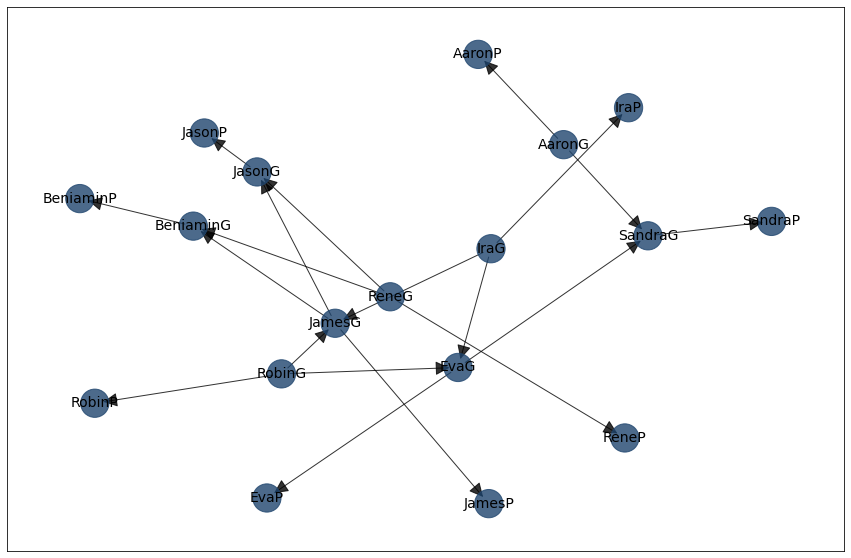

In [ ]:
bnlearn.plot(DAG)